In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('datamarttrain.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.shape

(8523, 12)

In [4]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

missing values are present in 2 columns of a dataset

In [7]:
#filling the missing values in dataset

from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='most_frequent')
df['Outlet_Size']=imp.fit_transform(df['Outlet_Size'].values.reshape(-1,1))

imp=SimpleImputer(strategy='mean')
df['Item_Weight']=imp.fit_transform(df['Item_Weight'].values.reshape(-1,1))

In [8]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

there are no missing values

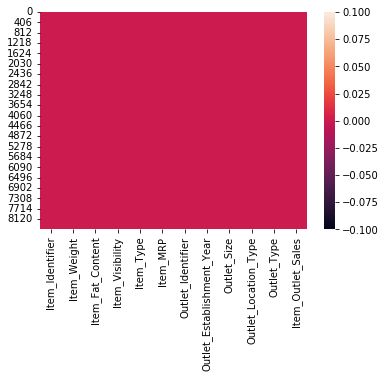

In [9]:
#Data visualization
#checking missing values
sns.heatmap(df.isnull())

In [10]:
#Statisticial Summary
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


1. mean is greater than 50percentile in item visibility and item outlet sales columns
2. mean is less than 50percentile in item mrp and outlet establishment year columns
3. there is a huge difference between 75percentile and max in all the columns

In [11]:
#coverting string data into integer data
import sklearn
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

list1=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
    
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [12]:
#checking correlation
dfcor=df.corr()
dfcor

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.098114,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.007225,-0.012058,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


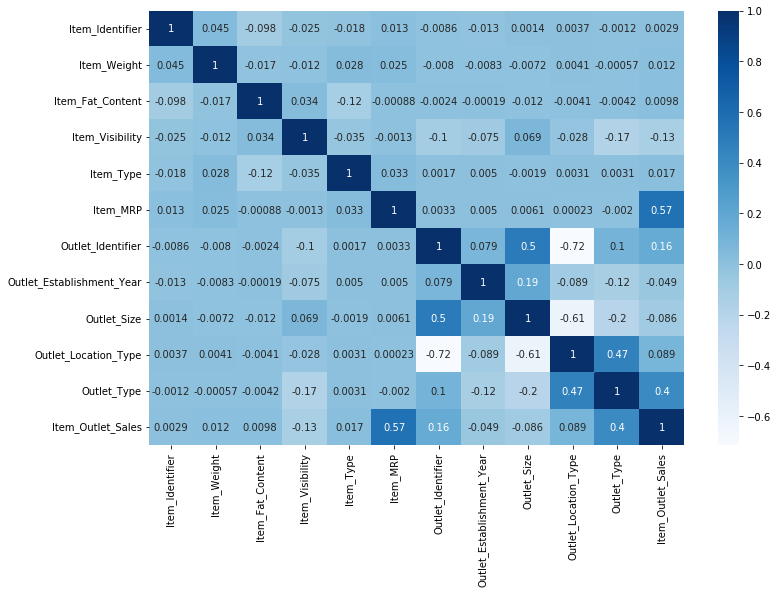

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap="Blues",annot=True)

1. outlet location type and outlet size is negatively correlated with each other
2. item outlet sales is highly correlated with item MRP
3. item outlet sales is negatively correlated with item visibility
4. item fat content is least correleated with item outlet sales

Item_Identifier                 AxesSubplot(0.125,0.536818;0.110714x0.343182)
Item_Weight                  AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Item_Fat_Content             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Item_Visibility              AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Item_Type                    AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Item_MRP                     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Outlet_Identifier                  AxesSubplot(0.125,0.125;0.110714x0.343182)
Outlet_Establishment_Year       AxesSubplot(0.257857,0.125;0.110714x0.343182)
Outlet_Size                     AxesSubplot(0.390714,0.125;0.110714x0.343182)
Outlet_Location_Type            AxesSubplot(0.523571,0.125;0.110714x0.343182)
Outlet_Type                     AxesSubplot(0.656429,0.125;0.110714x0.343182)
Item_Outlet_Sales               AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

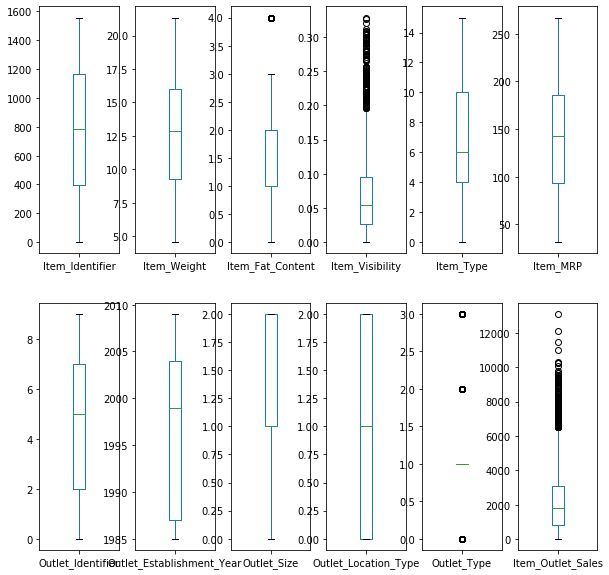

In [14]:
#finding outliers
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

outliers are present in item outlet sales, item visibility and item fat content columns

In [15]:
#checking skewness
df.skew().sort_values()

Outlet_Establishment_Year   -0.396641
Outlet_Location_Type        -0.209093
Outlet_Size                 -0.087072
Outlet_Identifier           -0.059861
Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Type                  0.927438
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Outlet_Sales            1.177531
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000015986108>,
      dtype=object)

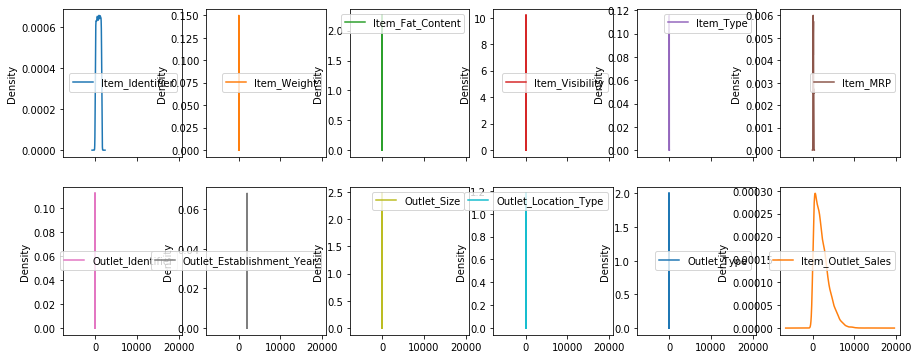

In [16]:
#checking the skewness
df.plot(kind='kde',subplots=True,layout=(2,6),figsize=(15,6))

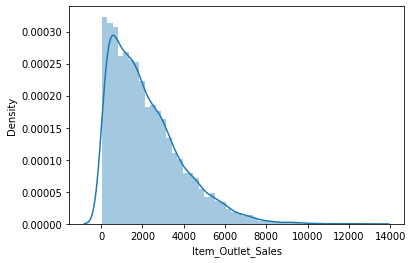

In [17]:
sns.distplot(df['Item_Outlet_Sales'])

skewness is present

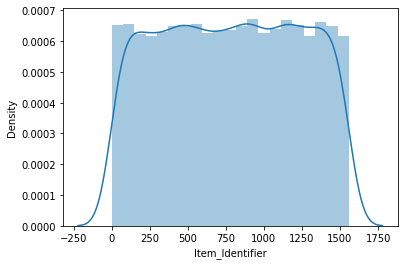

In [18]:
sns.distplot(df['Item_Identifier'])

data is not normally distributed

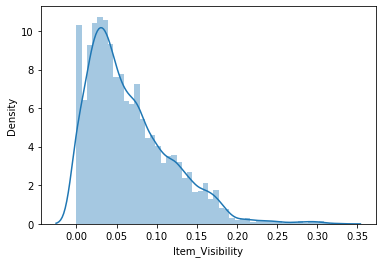

In [19]:
sns.distplot(df['Item_Visibility'])

little skweness is present

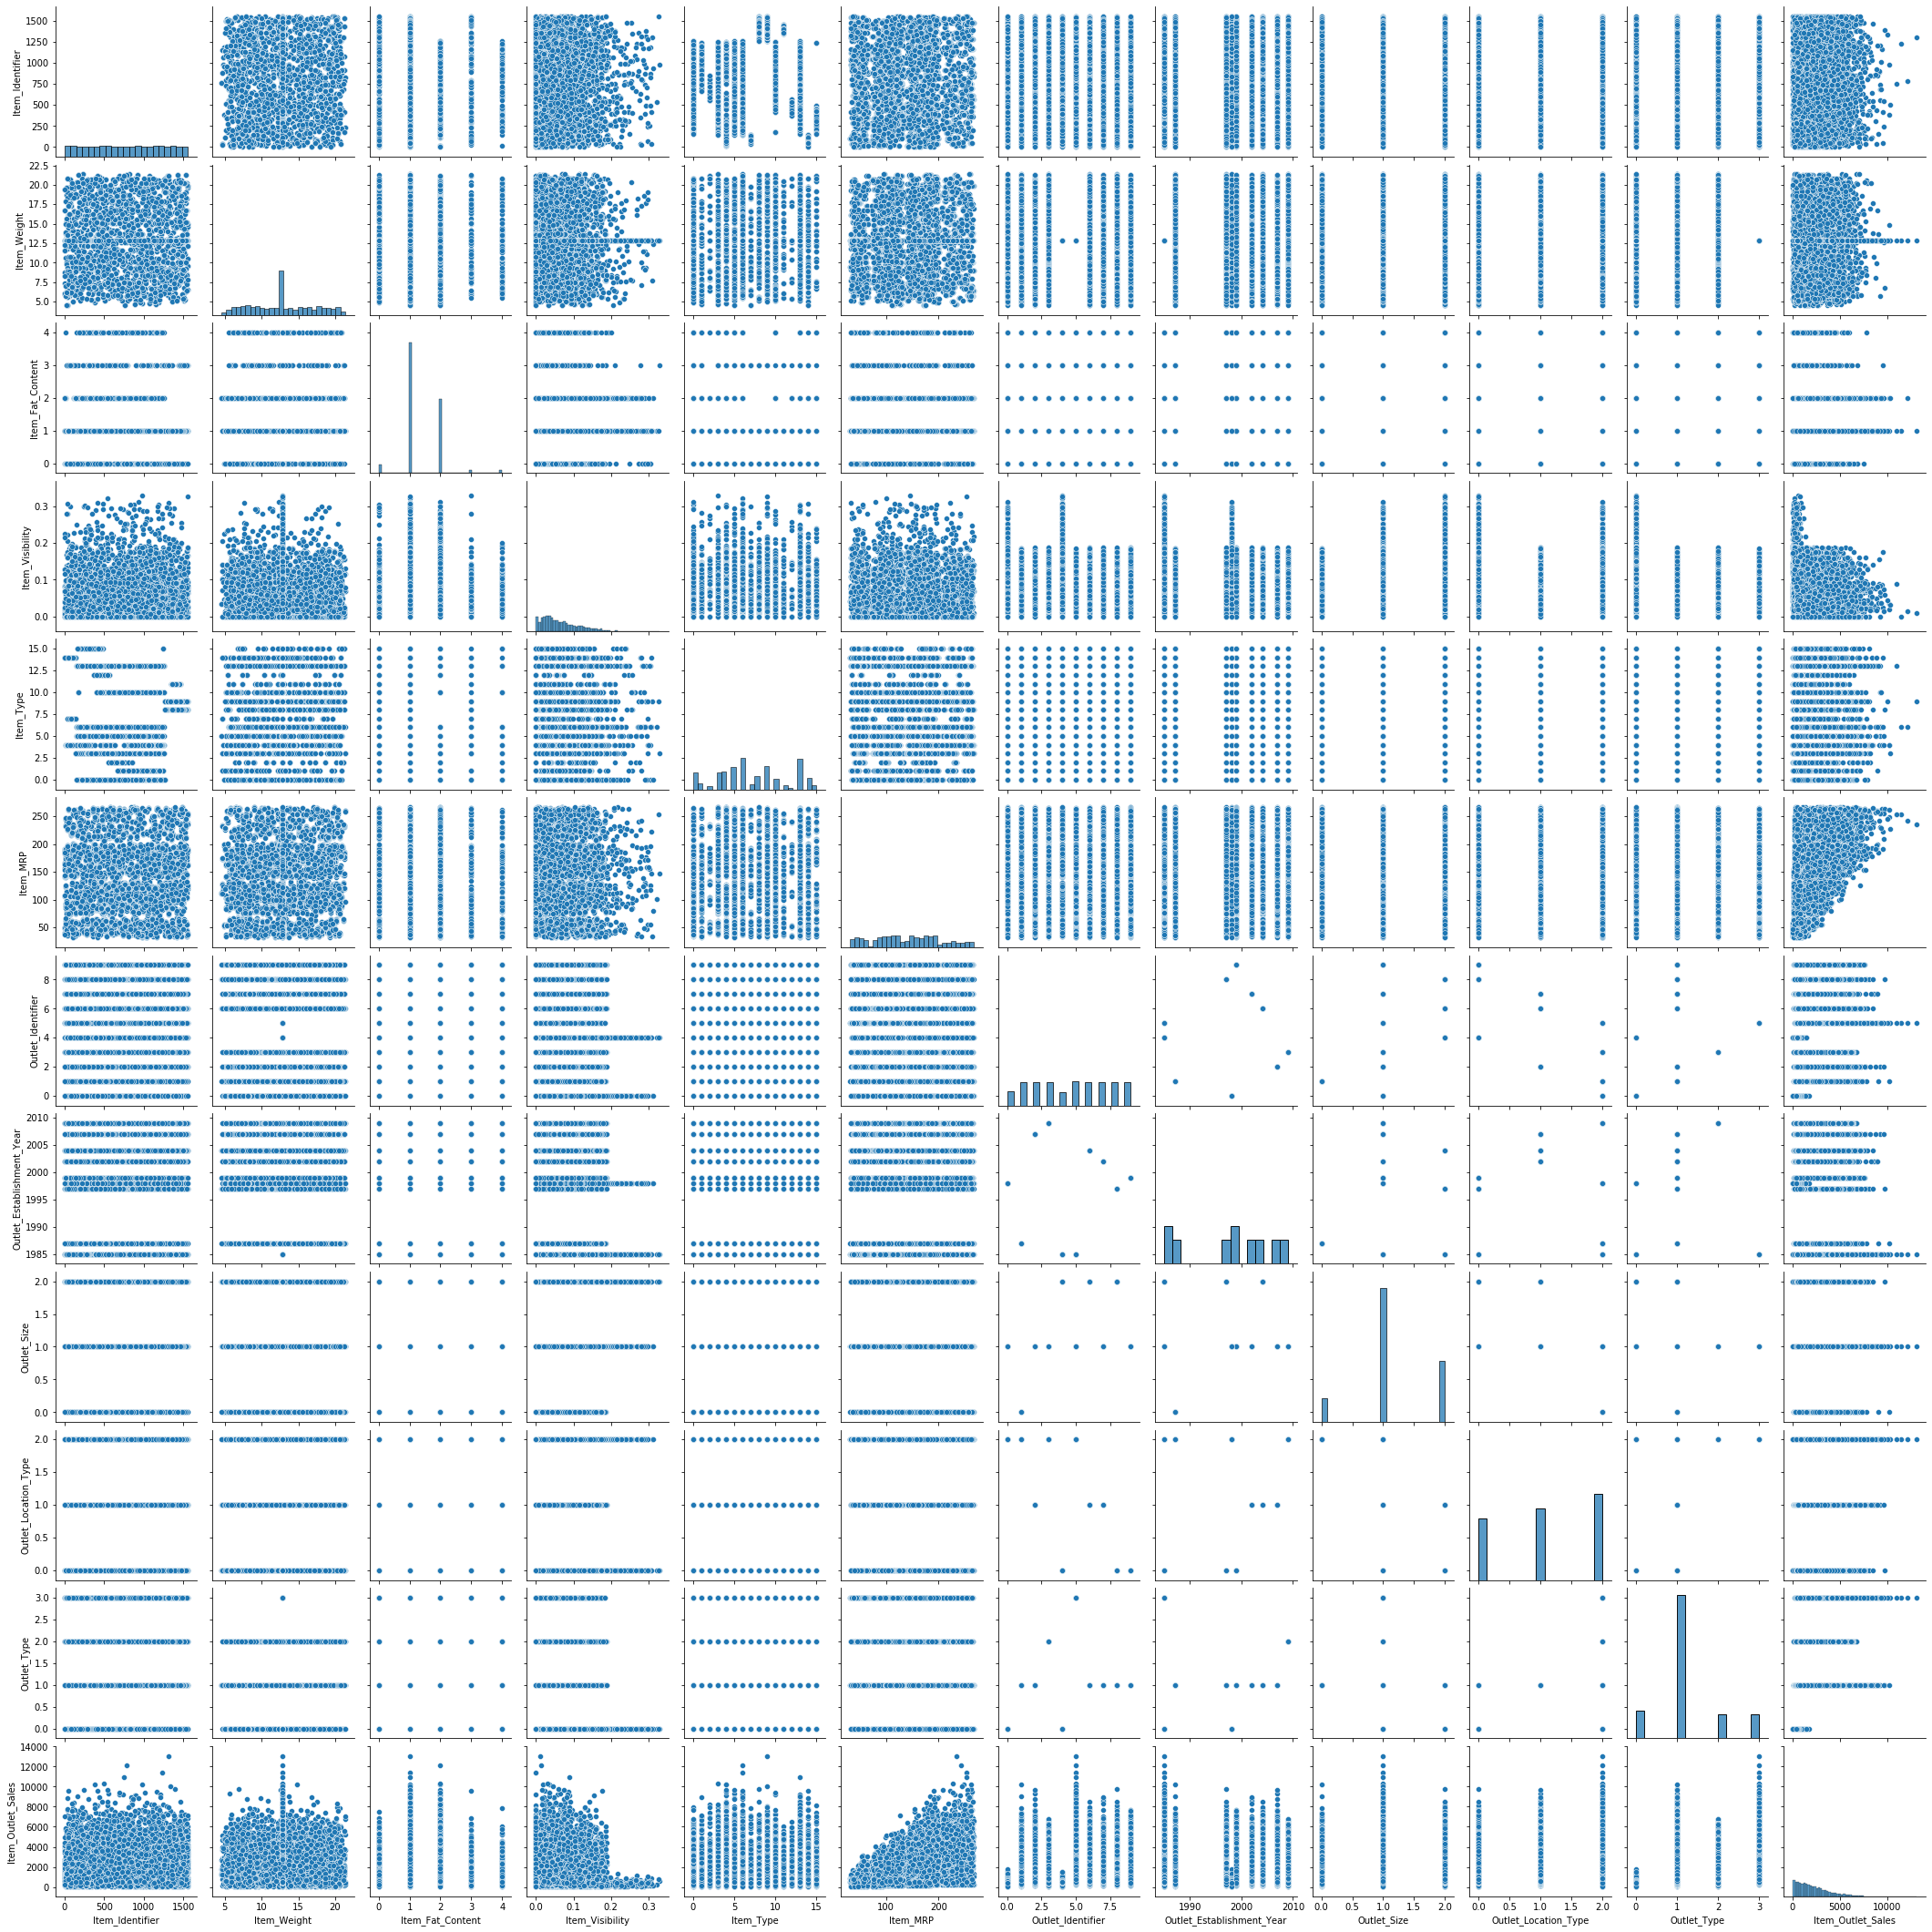

In [20]:
sns.pairplot(df)
plt.show()

In [21]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df.iloc[:,1:]))
z

array([[0.84187169, 0.57284357, 0.97073217, ..., 1.36933384, 0.25265831,
        0.910601  ],
       [1.64170589, 0.97809218, 0.90811123, ..., 1.09156913, 1.00297245,
        1.01844035],
       [1.09855449, 0.57284357, 0.95691733, ..., 1.36933384, 0.25265831,
        0.04923754],
       ...,
       [0.53424315, 0.57284357, 0.59978449, ..., 0.13888236, 0.25265831,
        0.57909963],
       [1.33644372, 0.97809218, 1.53287976, ..., 1.09156913, 1.00297245,
        0.19672492],
       [0.45963367, 0.57284357, 0.41193591, ..., 1.36933384, 0.25265831,
        0.82959407]])

In [22]:
threshold=3
print(np.where(z>3))

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
        333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
        615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
        991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
       1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
       1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
       1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
       2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
       2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
       2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
       3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
       3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
       3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
       3884, 3993, 4006, 4019, 4083, 4163, 4219, 4

In [23]:
dfnew=df[(z<3).all(axis=1)]
dfnew

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


300 rows are dropped

In [24]:
#separating data
x=dfnew.iloc[:,:-1]
y=dfnew.iloc[:,-1]

In [25]:
#multicollinearity
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [27]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2


In [28]:
calc_vif(x)

,variables,VIF FACTOR
0,Item_Identifier,4.051112
1,Item_Weight,10.186728
2,Item_Fat_Content,6.678151
3,Item_Visibility,2.890933
4,Item_Type,4.041505
5,Item_MRP,6.144651
6,Outlet_Identifier,15.614747
7,Outlet_Establishment_Year,63.280180
8,Outlet_Size,7.840381
9,Outlet_Location_Type,16.614472


In [29]:
x=x.drop(['Outlet_Establishment_Year','Outlet_Identifier','Outlet_Location_Type'],axis=1)

In [30]:
calc_vif(x)

,variables,VIF FACTOR
0,Item_Identifier,3.666126
1,Item_Weight,7.916488
2,Item_Fat_Content,5.342059
3,Item_Visibility,2.692594
4,Item_Type,3.621605
5,Item_MRP,5.414568
6,Outlet_Size,4.275091
7,Outlet_Type,3.108588


In [31]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Type
0,156,9.300,1,0.016047,4,249.8092,1,1
1,8,5.920,2,0.019278,14,48.2692,1,2
2,662,17.500,1,0.016760,10,141.6180,1,1
3,1121,19.200,2,0.000000,6,182.0950,1,0
4,1297,8.930,1,0.000000,9,53.8614,0,1
...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,0,1
8519,897,8.380,2,0.046982,0,108.1570,1,1
8520,1357,10.600,1,0.035186,8,85.1224,2,1
8521,681,7.210,2,0.145221,13,103.1332,1,2


In [32]:
#using linear regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=55)

In [68]:
lm=LinearRegression()

In [69]:
lm.fit(x_train,y_train)

LinearRegression()

In [70]:
lm.coef_

array([-4.52070032e-02, -2.69095068e+00,  6.00705256e+01, -1.46160426e+03,
       -2.87577079e+00,  1.47454475e+01, -4.95923457e+00,  7.64937893e+02])

In [71]:
lm.intercept_

-741.5373861944659

In [72]:
lm.score(x_train,y_train)

0.4733203497973755

In [73]:
pred=lm.predict(x_test)
print("predicted sales",pred)
print("actual sales",y_test)

predicted sales [2120.35826475 1335.62591691 2678.69721405 ... 4912.80067823  636.03568474
 2785.32237816]
actual sales 100     1805.6496
7736     826.9236
5346    2836.3080
829     5367.6796
3178     801.6232
          ...    
3600    3271.7412
5060    2492.7552
7940    5704.5744
1652     498.0184
2772    4563.3932
Name: Item_Outlet_Sales, Length: 2467, dtype: float64


In [74]:
print("error:")
print("mean absolute error",mean_absolute_error(y_test,pred))
print("mean squared error",mean_squared_error(y_test,pred))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error 891.297419248808
mean squared error 1366082.1603097634
root mean squared error 1168.7951746605404


In [75]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.4673270254762042


In [76]:
p=np.array([156,9.300,1,0.016047,4,249.8092,1,1])
p=p.reshape(1,-1)
p.shape

(1, 8)

In [77]:
lm.predict(p)

array([3695.02466698])

In [78]:
# Regularization:: L1 L2
from sklearn.linear_model import Lasso,Ridge

In [79]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.47332034979554405

In [80]:
ls.coef_

array([-4.52069556e-02, -2.69094750e+00,  6.00701295e+01, -1.46155938e+03,
       -2.87575718e+00,  1.47454472e+01, -4.95904674e+00,  7.64938045e+02])

In [81]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.47332034979725857

In [82]:
rd.coef_

array([-4.52069806e-02, -2.69095127e+00,  6.00704998e+01, -1.46159284e+03,
       -2.87576734e+00,  1.47454475e+01, -4.95925168e+00,  7.64937942e+02])

In [83]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.4733194225293197


array([-4.51433928e-02, -2.69259825e+00,  5.99976032e+01, -1.42944954e+03,
       -2.86607542e+00,  1.47452819e+01, -5.00761430e+00,  7.65073557e+02])

In [84]:
from sklearn.svm import SVR

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.4492725344431743
-0.01061275153718233
-0.030648596777299586


In [85]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)

knr.score(x_train,y_train)
predknr=knr.predict(x_test)
print(predknr)

knr.score(x_test,y_test)

[2268.91324 1720.4272  1638.93328 ... 3888.00568  465.79368 3126.06416]


0.17634041324828642

In [86]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtrpred=dtr.predict(x_test)
print(dtrpred)

dtr.score(x_test,y_test)

[1354.2372  193.082  1295.6468 ... 6976.2524  633.8416 2380.9008]


0.1674799489391272

In [87]:
#saving the best model

import pickle

filename='datamark.pkl'
pickle.dump(dtr, open(filename, 'wb'))
#load the model from disk
loaded_model=pickle.load(open(filename,'rb'))

loaded_model.predict(x_test)

array([1354.2372,  193.082 , 1295.6468, ..., 6976.2524,  633.8416,
       2380.9008])

In [88]:
#ensembling
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()

In [89]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(x_train,y_train)
train_r2=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
print('Training r2',train_r2)
rfs=r2_score(y_test,pred_decision)
print("R2Score:",rfs*100)

Training r2 0.9301610817107445
R2Score: 52.47533481680624


In [90]:
#conclusion

result=loaded_model.score(x_test,y_test)
print(result*100)

16.747994893912722


In [91]:
df1=pd.read_csv('datamarttest.csv')
#separating data
x1=df1.iloc[:,0:-1]
y1=df1.iloc[:,-1]

In [95]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y1[:]],index=['predicted','original'])
conclusion.transpose()

,predicted,original
0,1354.24,Supermarket Type1
1,193.082,Supermarket Type1
2,1295.65,Grocery Store
3,1701.78,Supermarket Type1
4,447.418,Supermarket Type3
...,...,...
5676,None,Supermarket Type1
5677,None,Supermarket Type2
5678,None,Supermarket Type1
5679,None,Supermarket Type1
